In [1]:
from map_boxes import mean_average_precision_for_boxes
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
ann = pd.read_csv('annotation.csv')
det = pd.read_csv('prediction.csv')
ann = ann[['ImageID', 'LabelName', 'XMin', 'XMax', 'YMin', 'YMax']].values
det = det[['ImageID', 'LabelName', 'Conf', 'XMin', 'XMax', 'YMin', 'YMax']].values
mean_ap, average_precisions = mean_average_precision_for_boxes(ann, det)

Number of files in annotations: 125
Number of files in predictions: 125
Unique classes: 5
Detections length: 125
Annotations length: 125
blowhole                       | 0.480000 |      25
break                          | 0.136364 |      22
crack                          | 1.000000 |      25
fray                           | 0.098214 |      28
uneven                         | 0.754000 |      25
mAP: 0.493716


In [2]:
box = pd.read_csv('result1.csv')
box

Unnamed: 0                 filename           x           y           w  \
0             0      exp4_num_317540.jpg   53.155785  102.236053   66.919205   
1             1  exp5_num_149023+bg+.jpg    4.929414   44.108055  128.000000   
2             2  exp6_num_242123+bg+.jpg    0.000000    4.995361  128.000000   
3             3  exp5_num_109313+bg+.jpg    6.430112   56.681644  126.873123   
4             4   exp6_num_26244+bg+.jpg    0.000000   15.164091  128.000000   
..          ...                      ...         ...         ...         ...   
118         118  exp5_num_276416+bg+.jpg   56.426350    1.159703   70.969849   
119         119  exp6_num_117060+bg+.jpg    0.143732   13.826000   13.553166   
120         120  exp4_num_172304+bg+.jpg  127.978668    7.613465  128.000000   
121         121      exp4_num_308078.jpg  120.359024   85.937111  128.000000   
122         122  exp5_num_339932+bg+.jpg   39.547188    0.655585   49.424515   

              h pred_class     score  width  height     class  xmin  ymin  \
0    112.675232   blowhole  0.987914    128     128  blowhole    52   102   
1    126.509148     uneven  0.093413    128     128     break     2   112   
2    115.926651     uneven  0.063028    128     128     break     2     1   
3    128.000000     uneven  0.997111    128     128    uneven     2    51   
4    117.936462     uneven  0.121551    128     128     break     1     1   
..          ...        ...       ...    ...     ...       ...   ...   ...   
118    9.019267      crack  0.268223    128     128     break    57     1   
119  112.347847      crack  0.186657    128     128     break     1    17   
120   20.949745      break  0.134762    128     128    uneven     1    18   
121   96.003006   blowhole  0.966983    128     128  blowhole   120    86   
122   16.291096      crack  0.947425    128     128     crack    40     1   

     xmax  ymax  image_id  
0      67   113        37  
1      51   126        72  
2      18    13       107  
3     128   128        32  
4      29    22         8  
..    ...   ...       ...  
118    73     8        14  
119    10    98        18  
120   128    78        93  
121   128    96        48  
122    49    15        27  

[123 rows x 16 columns]

In [3]:
import glob
import os
import cv2  

/home/dharaniprabhu/anaconda3/envs/detecto1/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


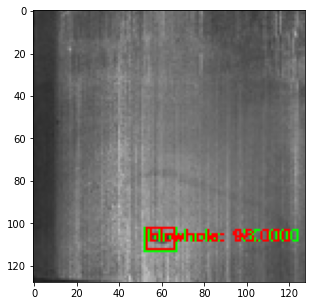

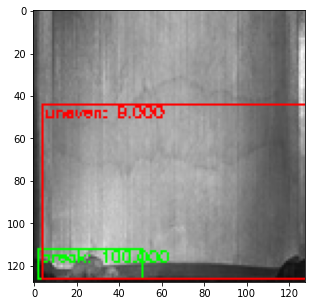

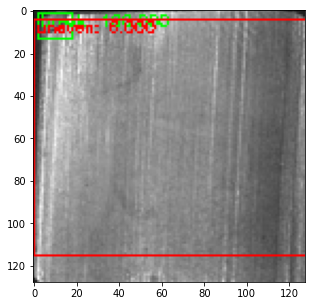

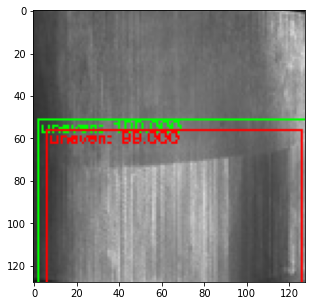

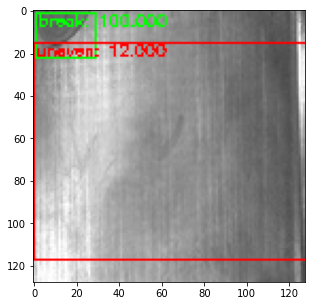

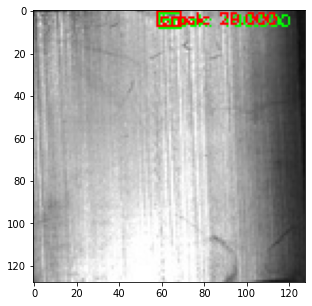

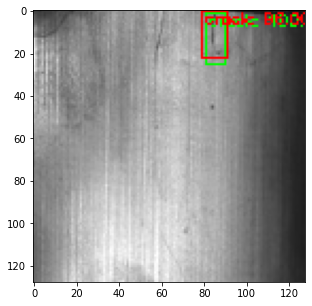

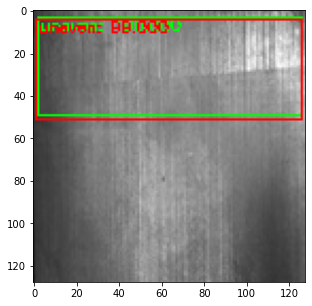

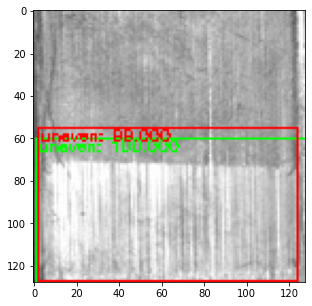

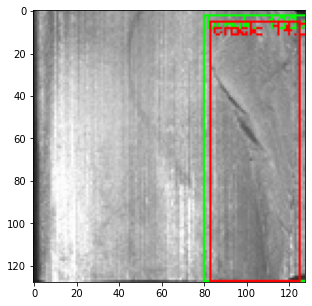

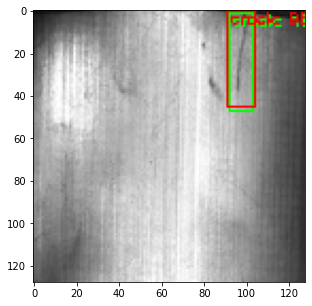

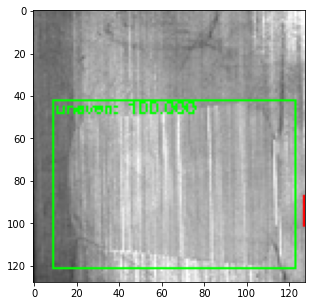

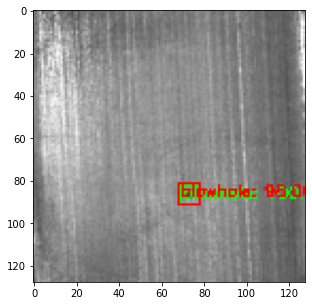

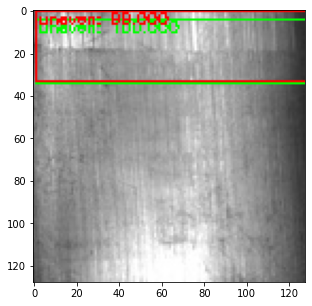

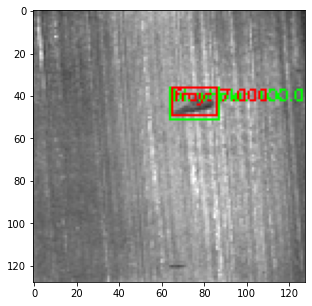

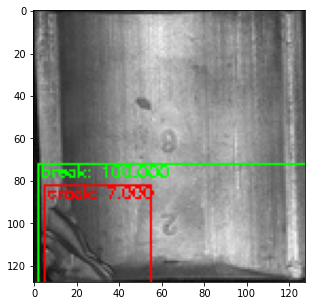

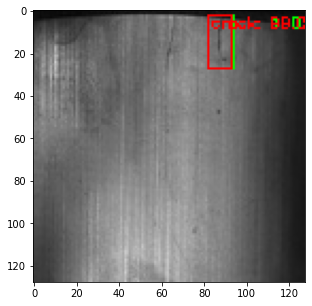

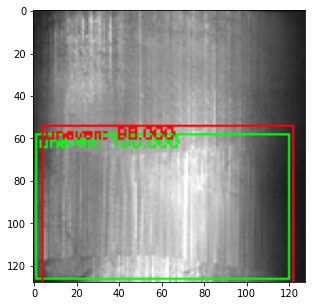

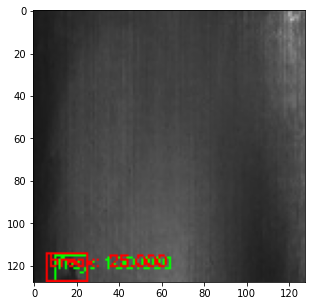

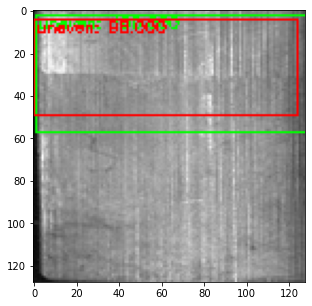

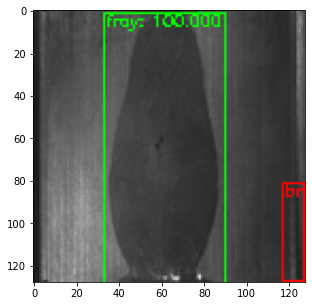

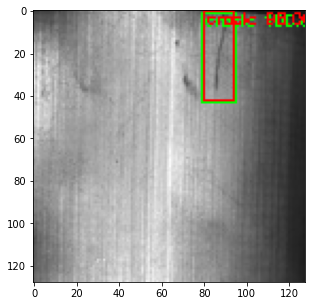

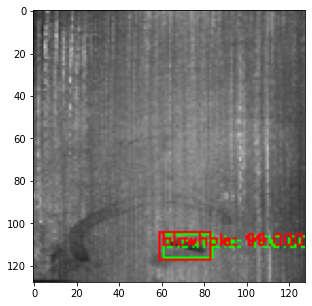

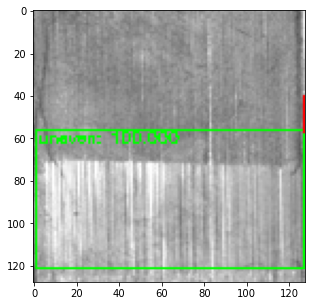

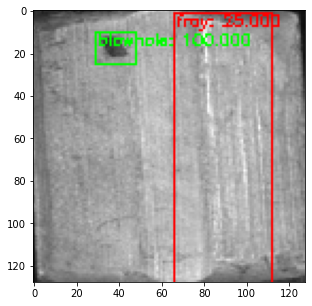

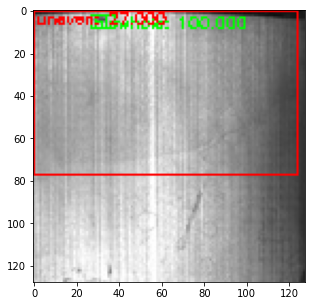

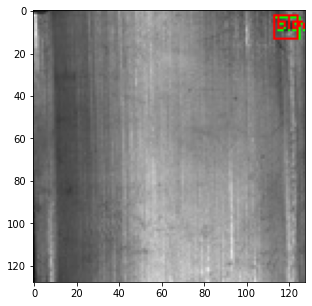

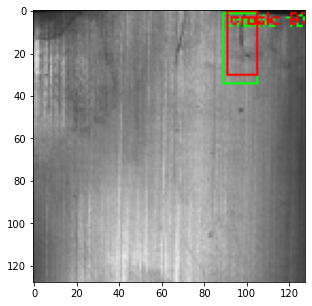

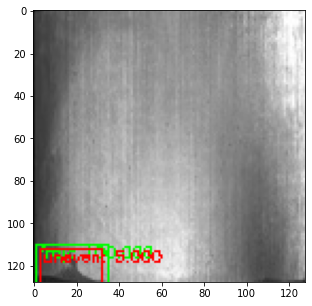

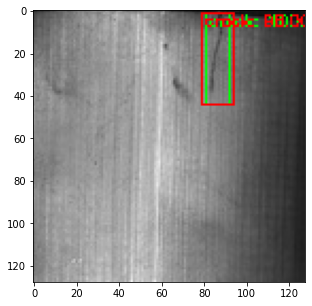

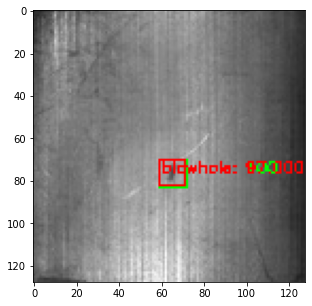

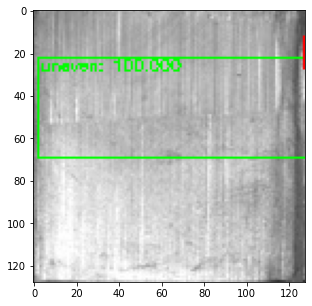

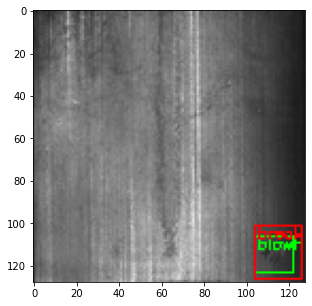

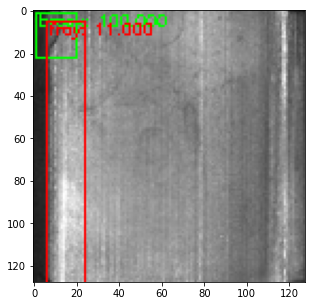

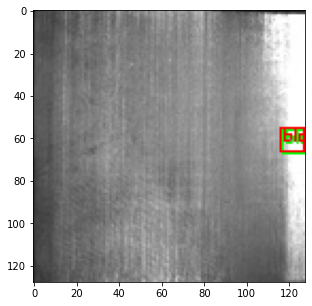

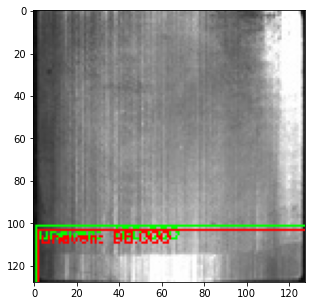

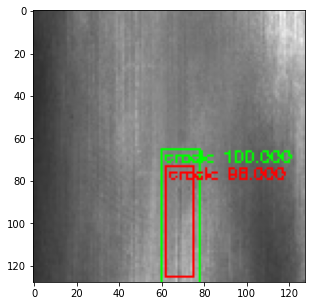

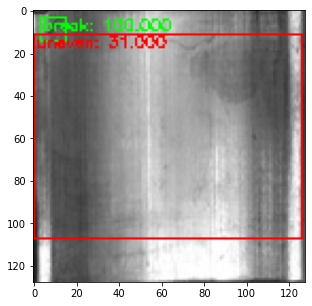

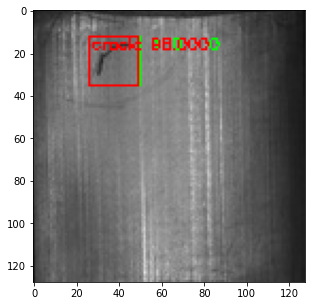

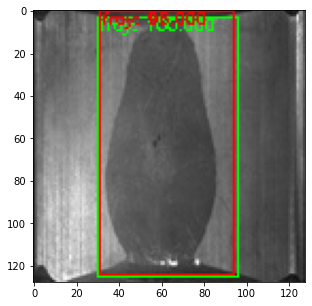

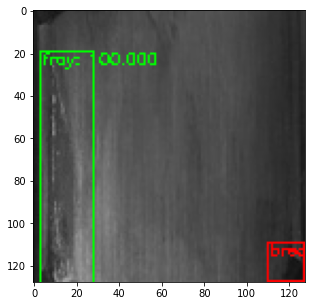

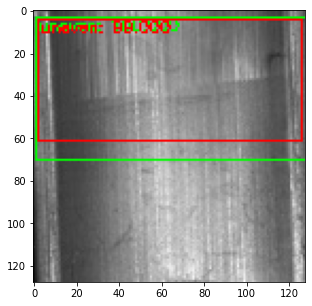

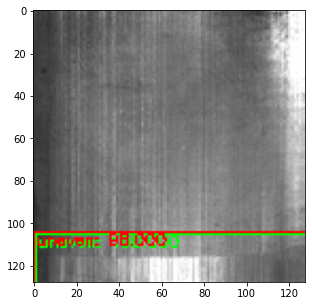

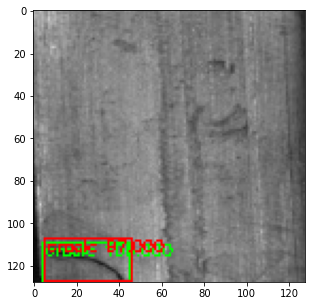

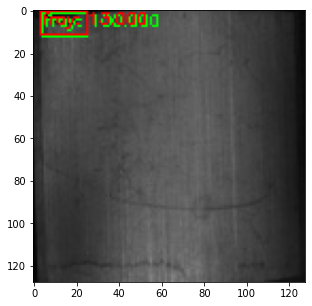

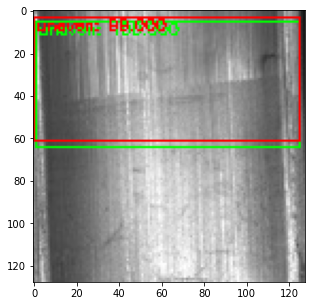

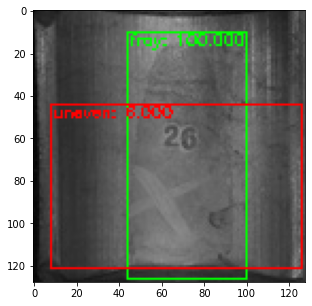

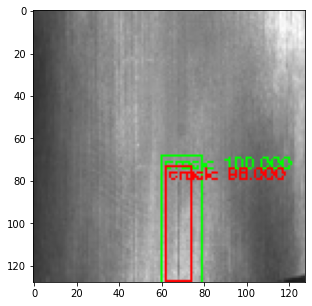

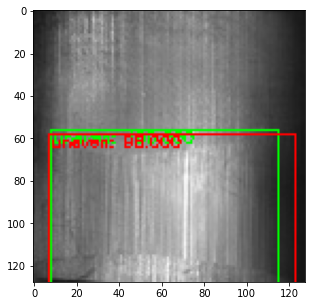

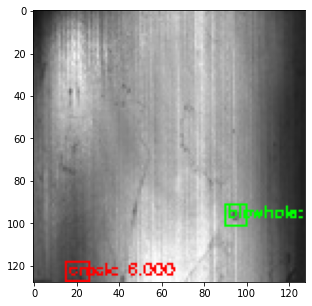

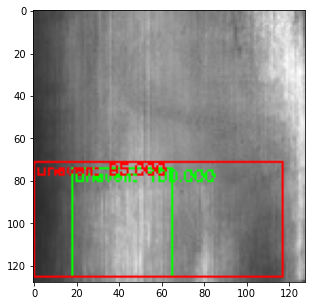

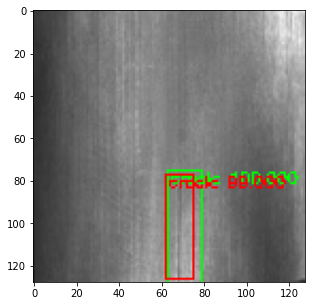

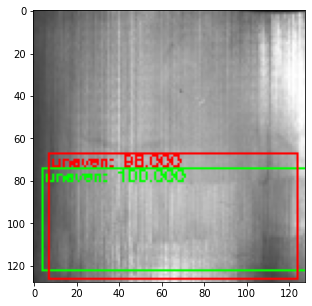

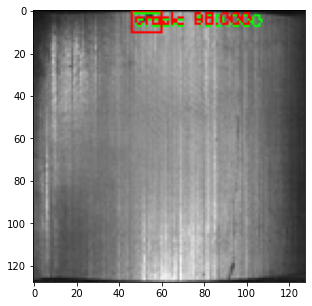

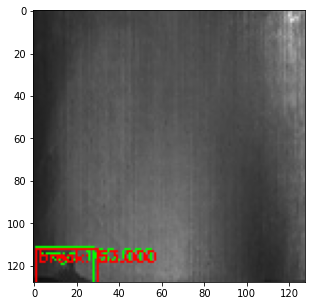

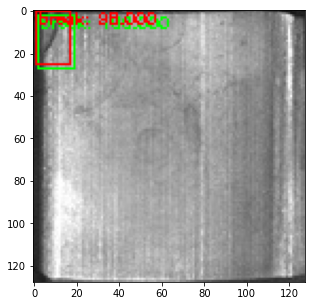

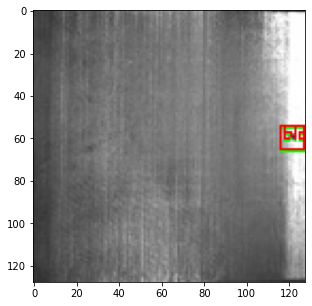

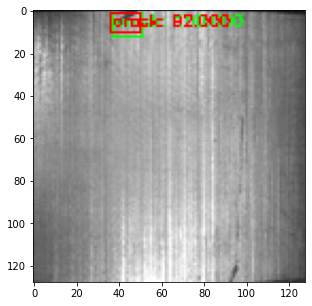

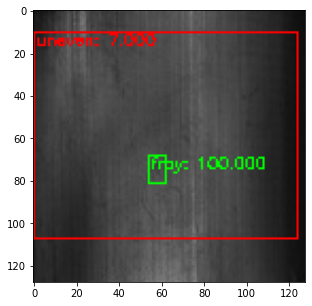

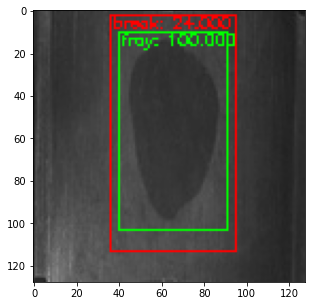

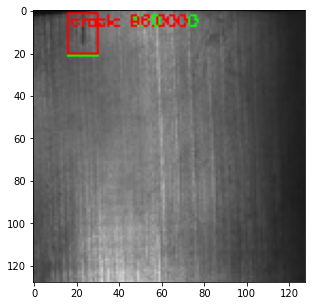

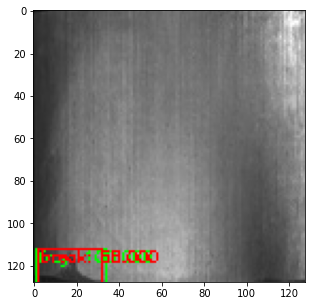

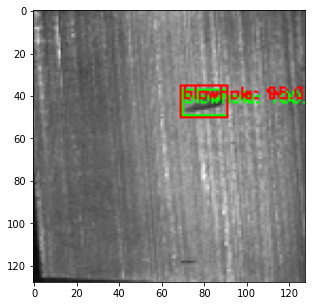

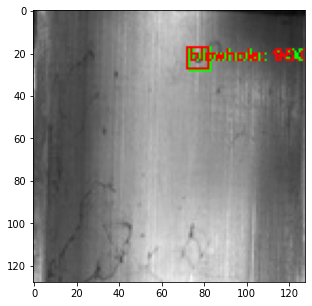

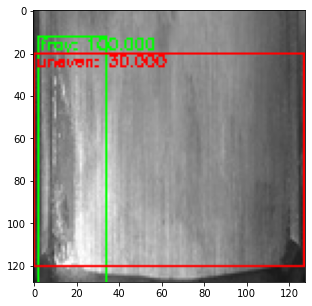

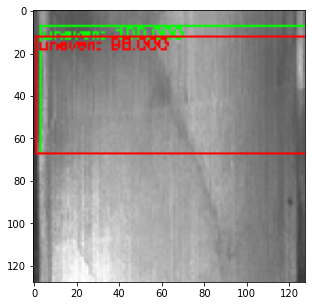

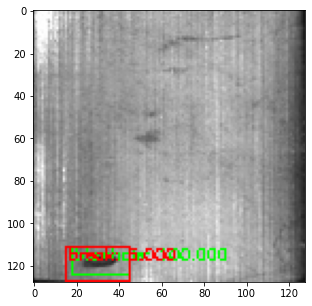

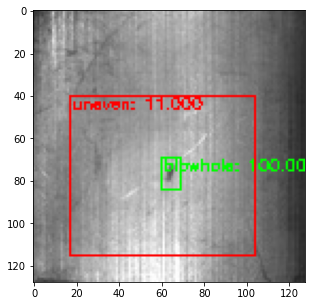

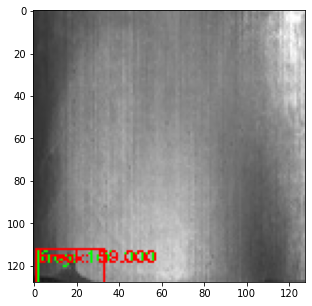

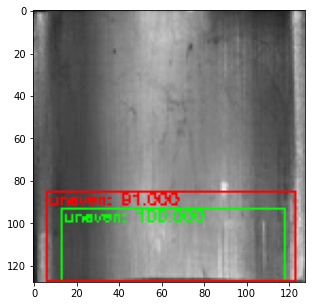

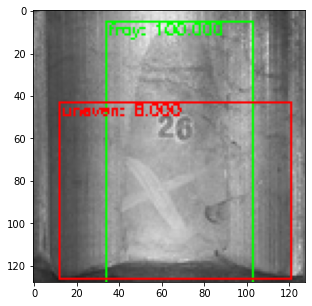

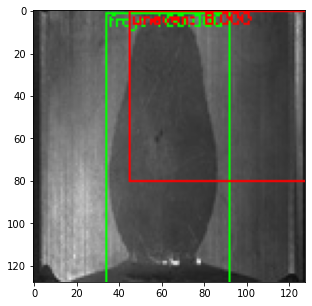

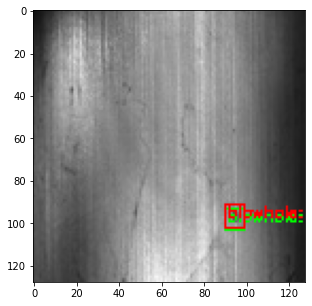

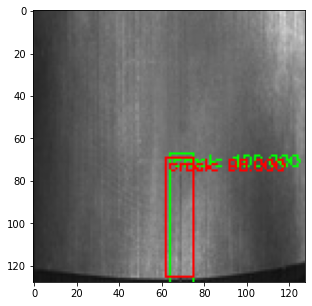

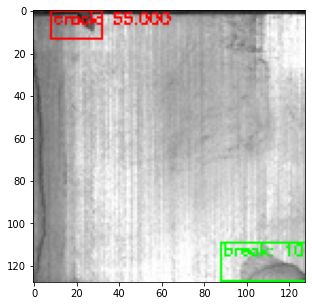

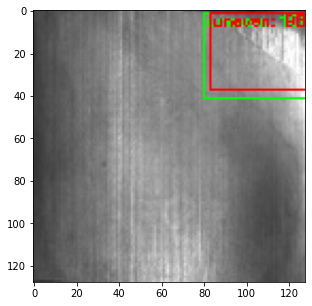

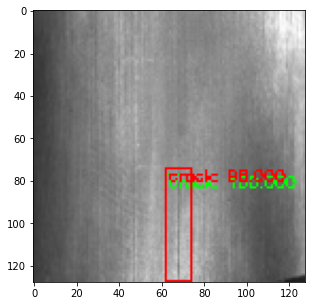

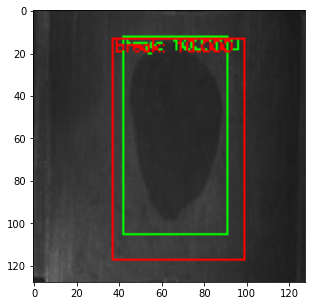

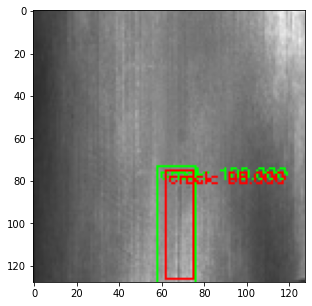

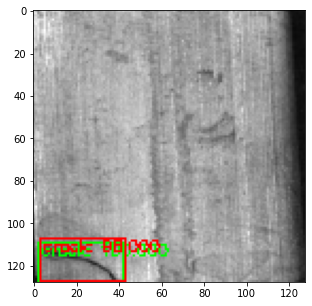

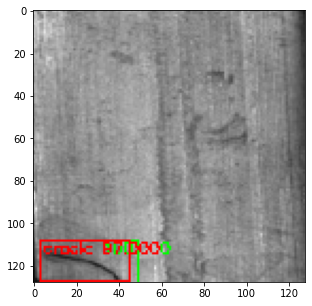

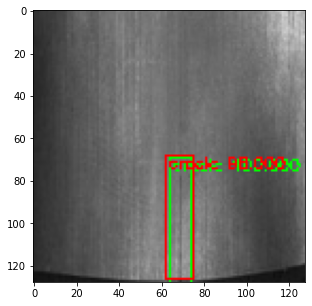

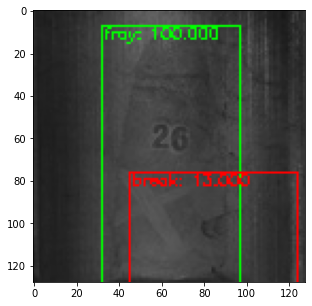

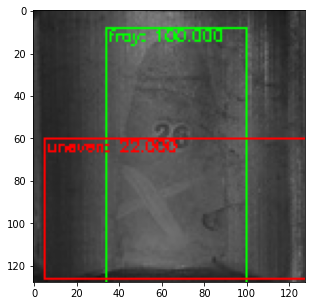

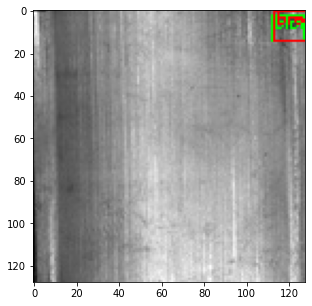

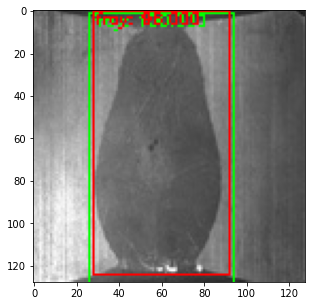

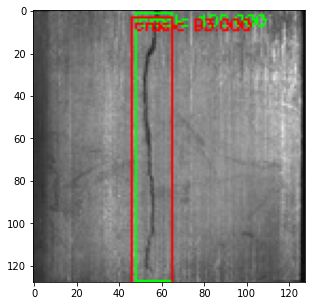

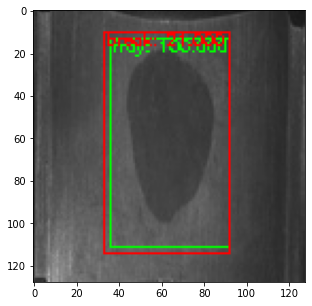

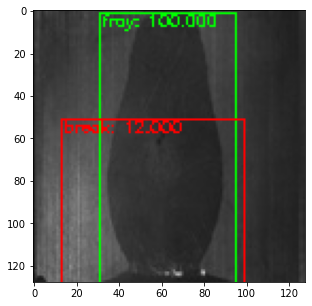

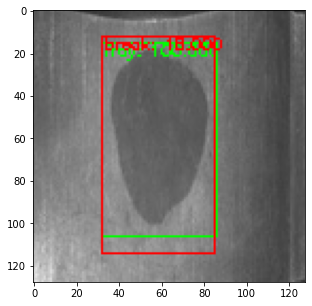

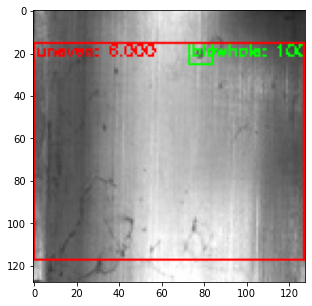

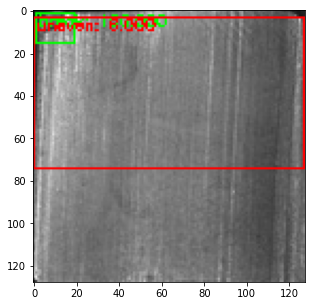

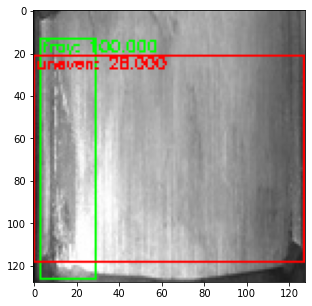

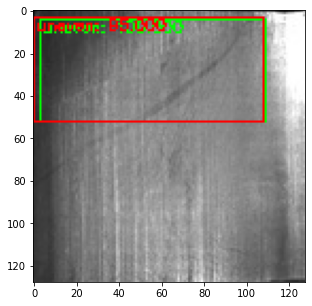

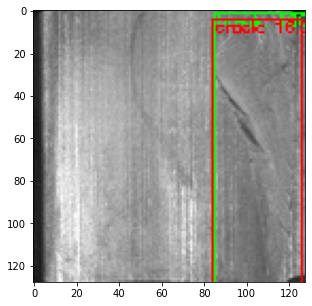

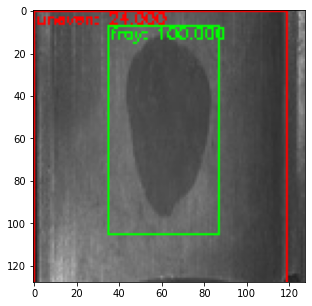

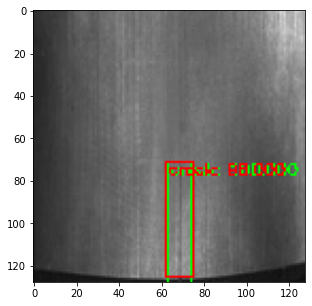

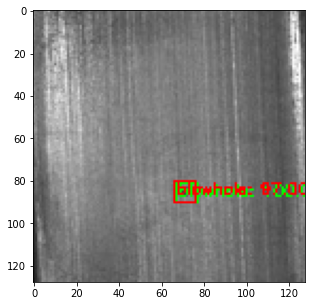

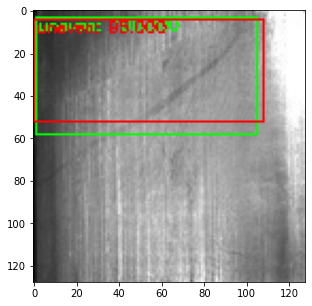

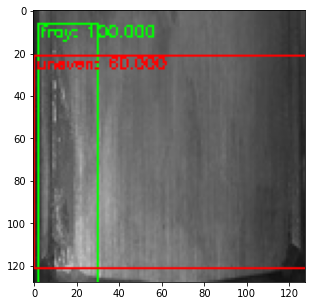

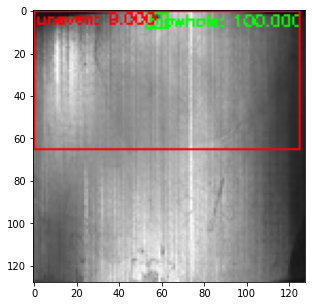

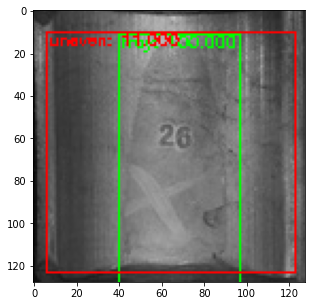

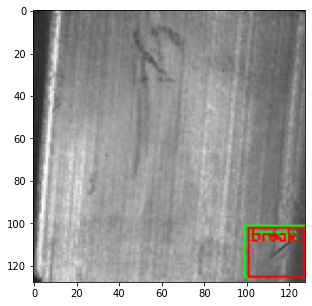

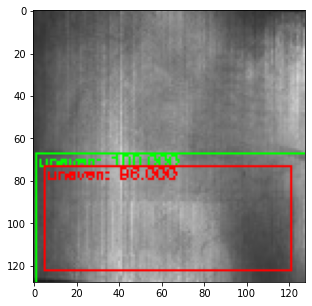

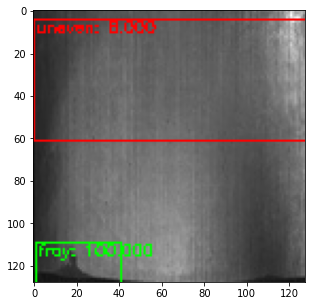

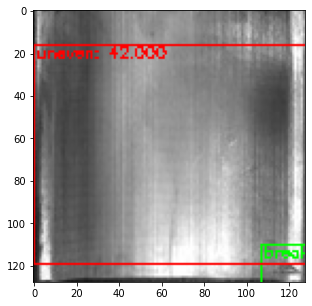

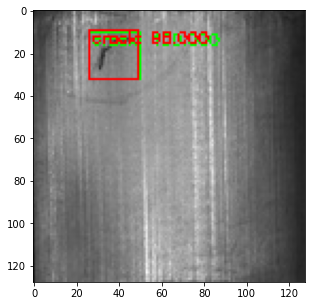

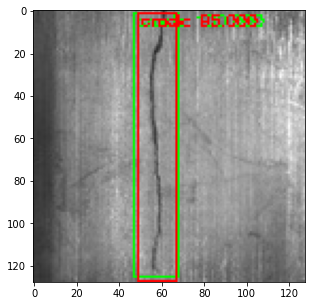

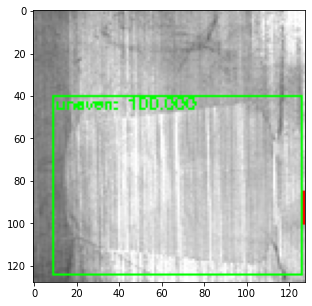

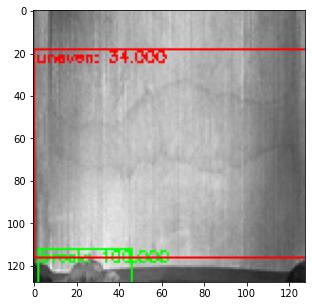

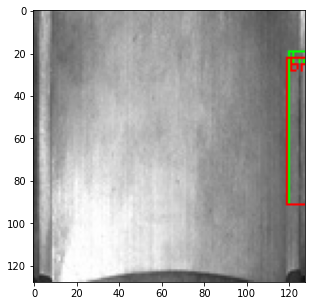

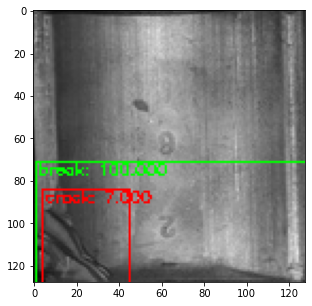

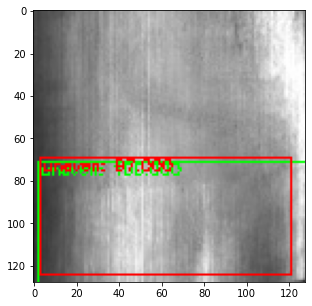

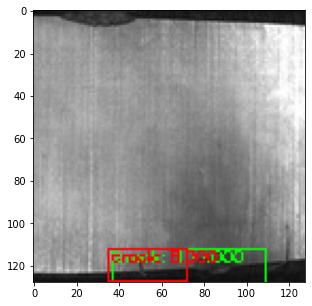

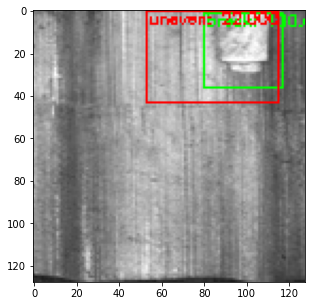

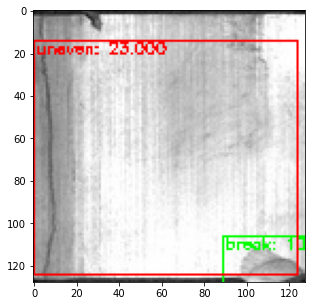

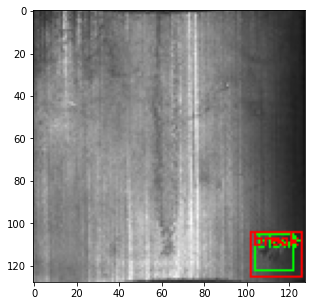

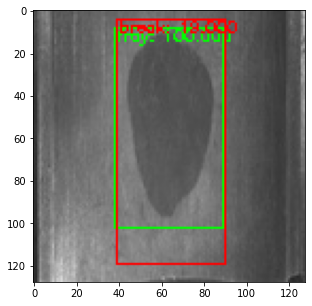

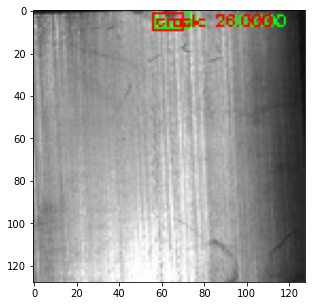

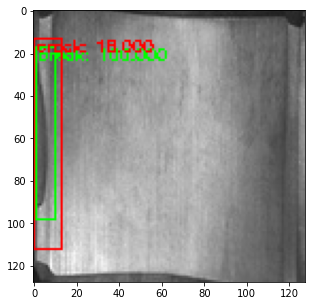

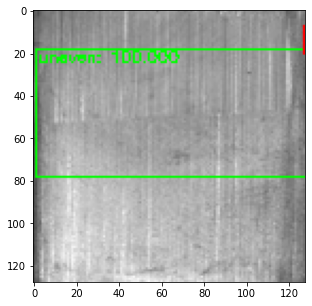

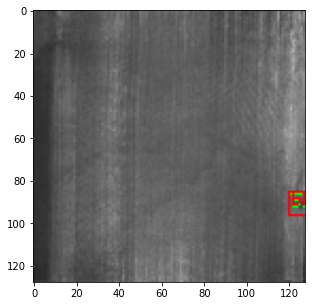

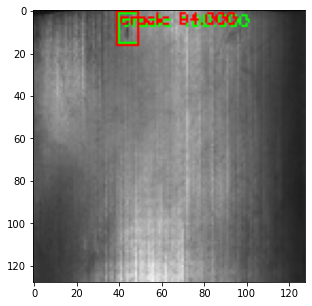

In [7]:
for index, row in box.iterrows():
    
    image_id = row['filename']
    file='mag_obj_test/'+image_id
    filname = os.path.basename(file)
    filename = os.path.splitext(filname)[0]
    image = cv2.imread(file)
    x2=int(row['x'])
    y2=int(row['y'])
    w2=int(row['w'])
    h2=int(row['h'])
    x1=int(row['xmin'])
    y1=int(row['ymin'])
    w1=int(row['xmax'])
    h1=int(row['ymax'])
    label = row['pred_class']
    label1 = row['class']
    score = row['score'] * 100
    scor = int(score)
    cv2.rectangle(image, (x1, y1), (w1, h1), (0,255,0), 1)
    cv2.putText(image, '%s: %.3f' % (label1 ,100), (x1+1, y1+6), cv2.FONT_HERSHEY_SIMPLEX,0.25, (0, 255, 0), thickness=1)
    cv2.rectangle(image, (x2, y2), (w2, h2), (255, 0, 0), 1)
    cv2.putText(image, '%s: %.3f' % (label, scor), (x2+1, y2+6), cv2.FONT_HERSHEY_SIMPLEX,0.25, (255, 0, 0), thickness=1)
    cv2.imwrite('resultbbox1/'+filename+'bbox.jpg', image)
    fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    ax.imshow(image)